In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("/content/sample_data/reddit_posts.csv")

In [3]:
data.head()

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09


In [4]:
data = data.drop(columns=['Id','URL', 'Date Created'])

In [5]:
data.head()

,Title,Political Lean,Score,Subreddit,Num of Comments,Text
0,"No matter who someone is, how they look like, ...",Liberal,1,socialism,0,NaN
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,democrats,1,NaN
2,State of the union,Liberal,1,DemocraticSocialism,1,Who watched the state of the union last night ...
3,We Should Just Give Poor People Money,Liberal,7,SocialDemocracy,3,NaN
4,Do it for the Dew,Liberal,6,democrats,1,NaN


In [6]:
data.isnull().sum()

,0
Title,0
Political Lean,0
Score,0
Subreddit,0
Num of Comments,0
Text,10426


In [7]:
data.isna().sum()

,0
Title,0
Political Lean,0
Score,0
Subreddit,0
Num of Comments,0
Text,10426


In [9]:
data.shape

(12854, 6)

In [10]:
data.describe()

,Score,Num of Comments
count,12854.000000,12854.000000
mean,118.558270,19.055936
std,498.888034,60.381567
min,0.000000,0.000000
25%,3.000000,1.000000
50%,12.000000,3.000000
75%,65.000000,15.000000
max,25055.000000,2150.000000


In [11]:
data['Text']=data['Text'].fillna('')
data['Title']=data['Title'].fillna('')

In [12]:
data['full_posts'] = data['Title'] + '\n' + data['Text']


In [13]:
data.head()

,Title,Political Lean,Score,Subreddit,Num of Comments,Text,full_posts
0,"No matter who someone is, how they look like, ...",Liberal,1,socialism,0,,"No matter who someone is, how they look like, ..."
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,democrats,1,,Biden speech draws 38.2 million U.S. TV viewers\n
2,State of the union,Liberal,1,DemocraticSocialism,1,Who watched the state of the union last night ...,State of the union\nWho watched the state of t...
3,We Should Just Give Poor People Money,Liberal,7,SocialDemocracy,3,,We Should Just Give Poor People Money\n
4,Do it for the Dew,Liberal,6,democrats,1,,Do it for the Dew\n


In [14]:
data['Political Lean'].value_counts()

,count
Political Lean,
Liberal,8319
Conservative,4535


<Axes: xlabel='Political Lean'>

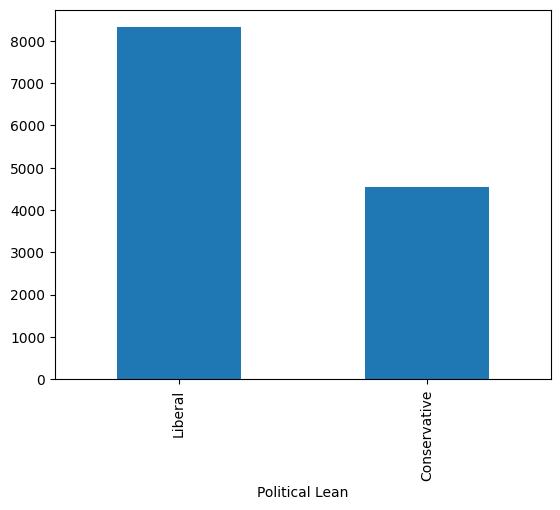

In [15]:
data['Political Lean'].value_counts().plot(kind='bar')


In [16]:
data['Subreddit'].value_counts()

,count
Subreddit,
conservatives,1000
alltheleft,997
SocialDemocracy,997
Libertarian,975
Capitalism,975
socialism,975
progressive,974
republicans,948
democrats,941


<Axes: ylabel='Subreddit'>

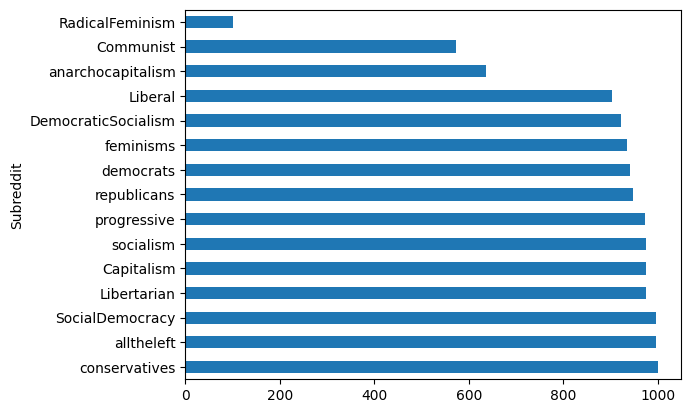

In [17]:
data['Subreddit'].value_counts().plot(kind='barh')


In [21]:
subreddit_counts = data.groupby(['Political Lean', 'Subreddit']).size().reset_index(name='count')

In [25]:
color_map = {
    'Conservative': 'red',
    'Liberal': 'blue'
}

# Apply the palette based on the order of hue levels
hue_order = ['Conservative', 'Liberal']
palette = [color_map[hue] for hue in hue_order]

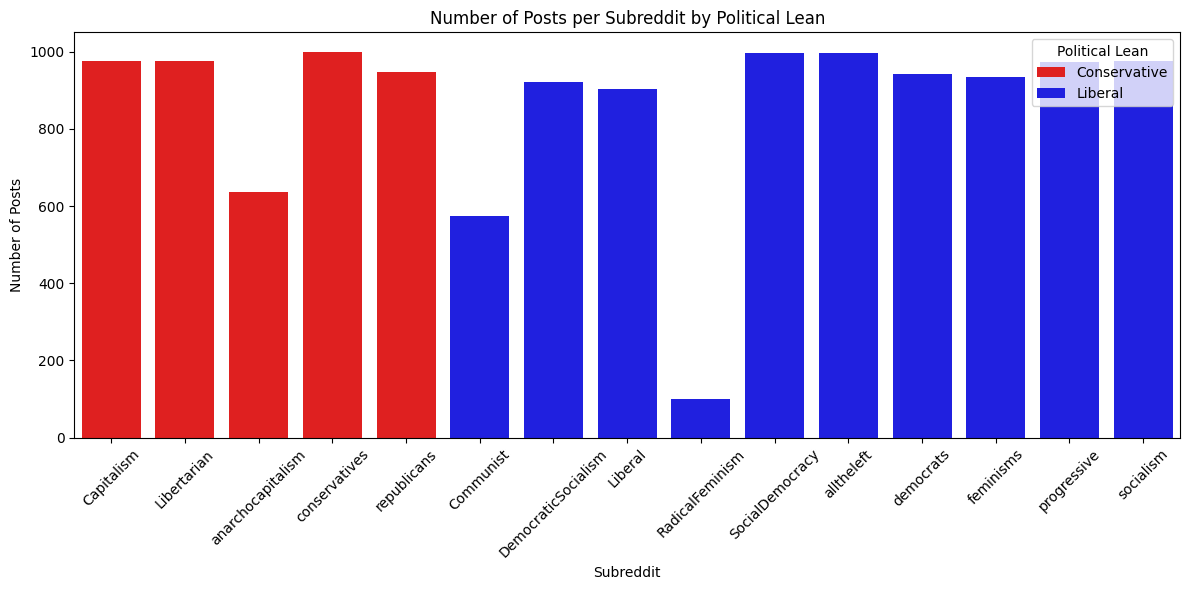

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=subreddit_counts,
    x='Subreddit',
    y='count',
    hue='Political Lean',
    palette=palette
)

plt.title("Number of Posts per Subreddit by Political Lean")
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
data['word_count'] = data['full_posts'].apply(lambda x: len(x.split()))
data['char_count'] = data['full_posts'].apply(len)


In [28]:
data.head()

,Title,Political Lean,Score,Subreddit,Num of Comments,Text,full_posts,word_count,char_count
0,"No matter who someone is, how they look like, ...",Liberal,1,socialism,0,,"No matter who someone is, how they look like, ...",35,204
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,democrats,1,,Biden speech draws 38.2 million U.S. TV viewers\n,8,48
2,State of the union,Liberal,1,DemocraticSocialism,1,Who watched the state of the union last night ...,State of the union\nWho watched the state of t...,18,91
3,We Should Just Give Poor People Money,Liberal,7,SocialDemocracy,3,,We Should Just Give Poor People Money\n,7,38
4,Do it for the Dew,Liberal,6,democrats,1,,Do it for the Dew\n,5,18


<Axes: xlabel='Political Lean', ylabel='word_count'>

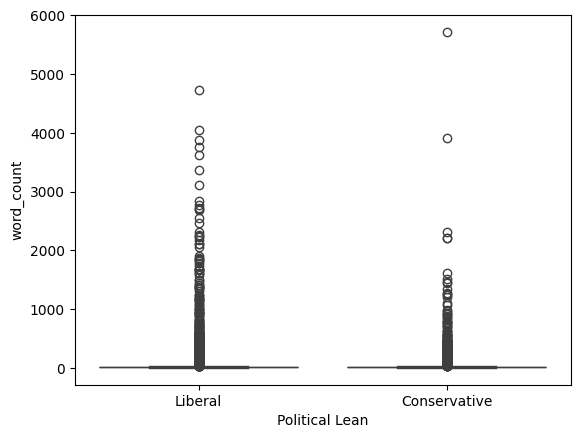

In [29]:
sns.boxplot(x='Political Lean', y='word_count', data=data)


In [30]:
import nltk
import os
import re
import string
import spacy

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
custom_stopwords=set(stopwords.words('english'))

In [34]:
stopwords_to_keep = ['not', 'no', 'never', 'should', 'would', 'could',
                     'must', 'can', 'our', 'us', 'they', 'them',
                     'he', 'she', 'his', 'her', 'you', 'we', 'all', 'more', 'less',
                     'because', 'if', 'but', 'how', 'why', 'what', 'which', 'who']

custom_stopwords = custom_stopwords - set(stopwords_to_keep)

In [35]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-alphabetic characters (keeping spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stop words
    words = [word for word in text.split() if word not in custom_stopwords]

    # Lemmatization using spaCy
    doc = nlp(" ".join(words))
    lemmas = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']

    return " ".join(lemmas)

In [37]:
data['clean_text'] = data['full_posts'].apply(clean_text)

In [38]:
liberal_posts = data[data['Political Lean'] == 'Liberal']['clean_text']
conservative_posts = data[data['Political Lean'] == 'Conservative']['clean_text']


In [39]:
from collections import Counter

# Tokenize each post into words and count
liberal_words = Counter(" ".join(liberal_posts).split())
conservative_words = Counter(" ".join(conservative_posts).split())

# Get top 20
top_liberal = liberal_words.most_common(20)
top_conservative = conservative_words.most_common(20)

print("Top 20 Liberal Words:\n", top_liberal)
print("\nTop 20 Conservative Words:\n", top_conservative)


Top 20 Liberal Words:
 [('not', 3682), ('they', 2599), ('we', 2458), ('you', 1991), ('but', 1891), ('what', 1630), ('people', 1507), ('can', 1408), ('would', 1301), ('if', 1291), ('all', 1265), ('more', 1159), ('like', 1157), ('how', 1098), ('who', 1074), ('do', 1049), ('make', 972), ('party', 968), ('one', 962), ('get', 949)]

Top 20 Conservative Words:
 [('not', 2291), ('you', 1549), ('they', 1321), ('we', 1290), ('people', 902), ('what', 852), ('but', 822), ('if', 819), ('can', 737), ('would', 694), ('do', 664), ('how', 636), ('all', 624), ('who', 594), ('get', 584), ('say', 580), ('he', 570), ('more', 551), ('make', 530), ('trump', 523)]


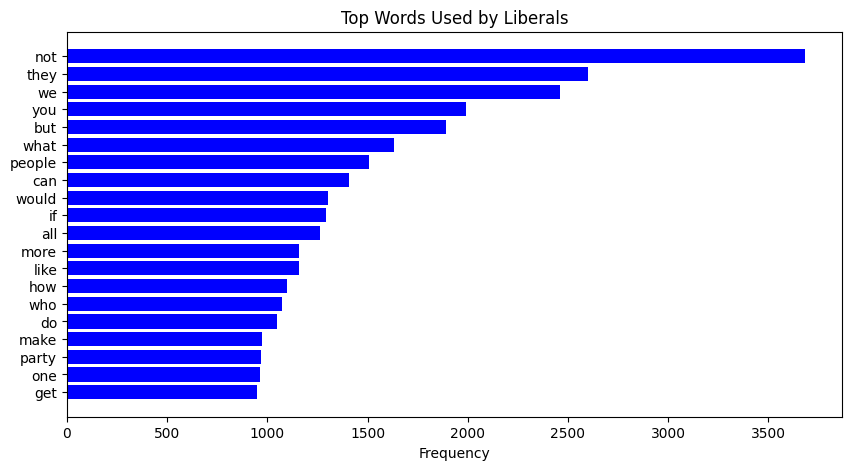

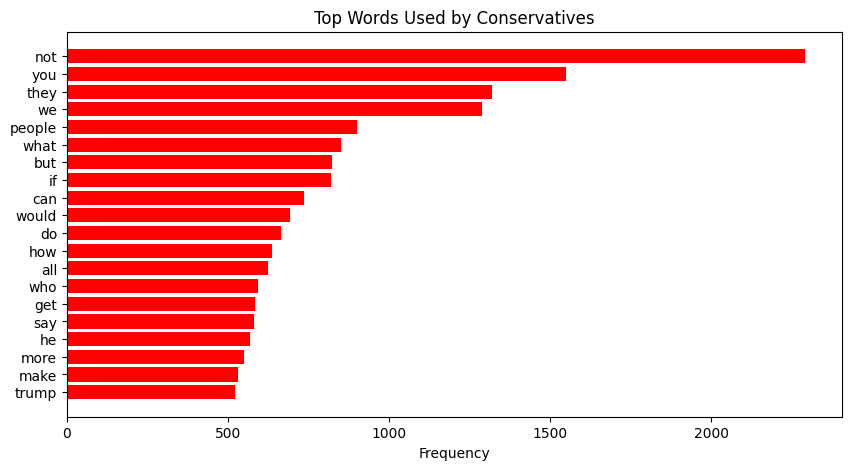

In [40]:
def plot_top_words(word_freq, title, color):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], counts[::-1], color=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

plot_top_words(top_liberal, "Top Words Used by Liberals", "blue")
plot_top_words(top_conservative, "Top Words Used by Conservatives", "red")

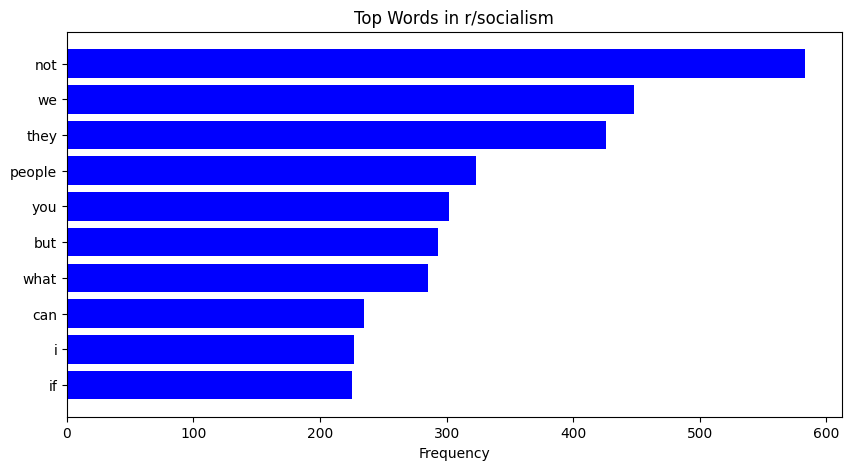

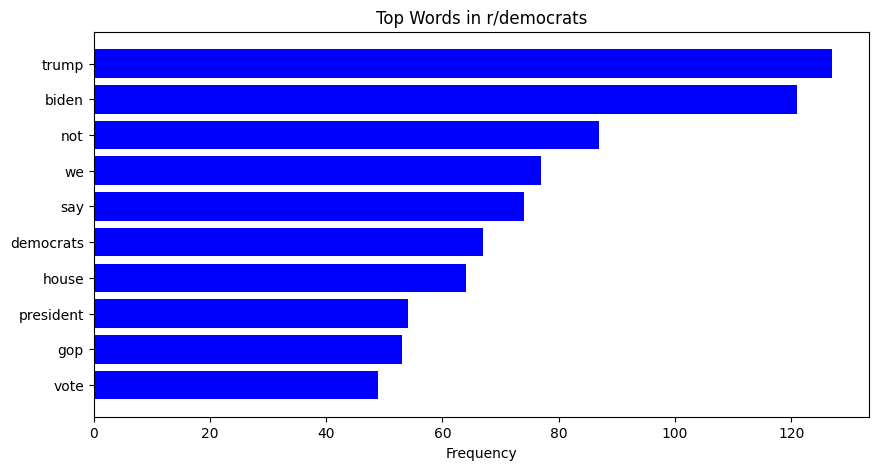

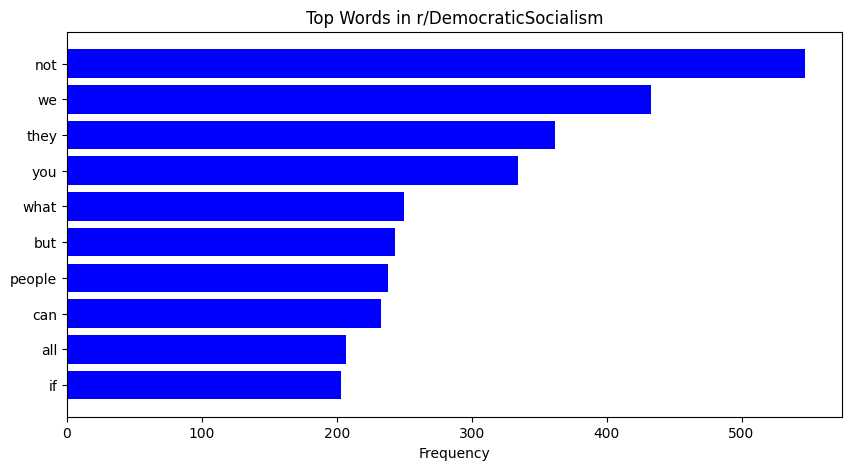

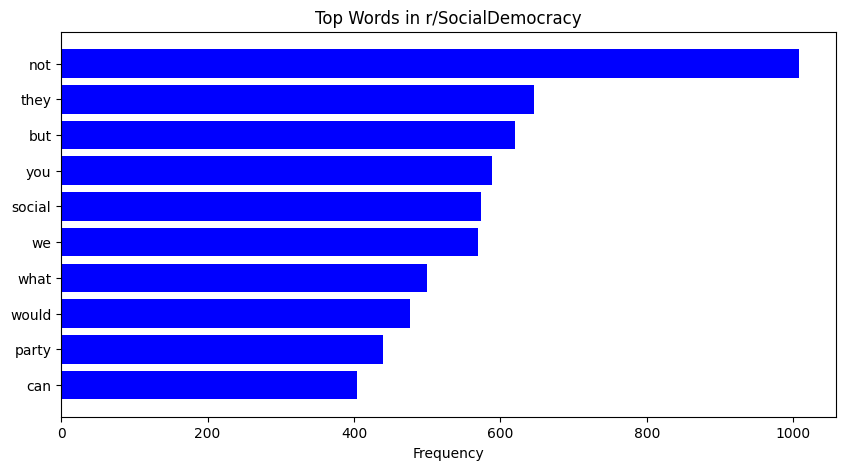

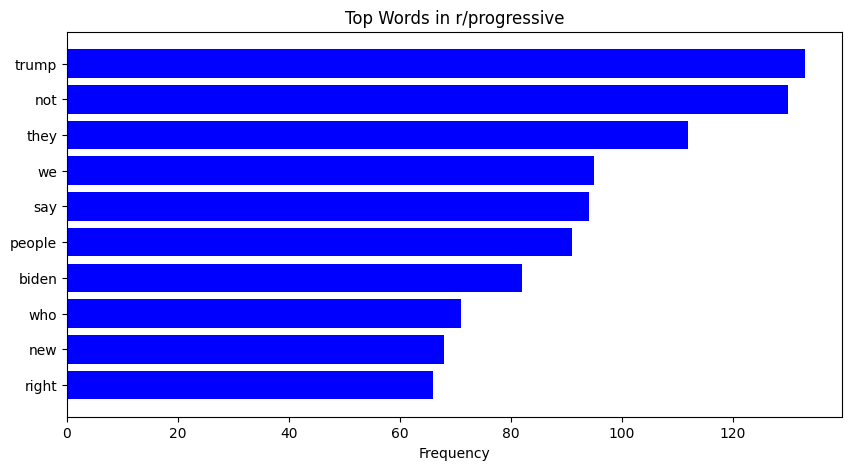

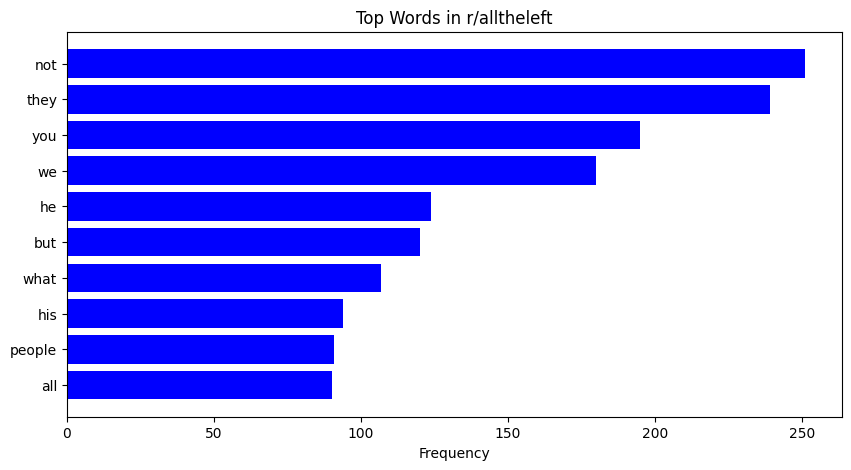

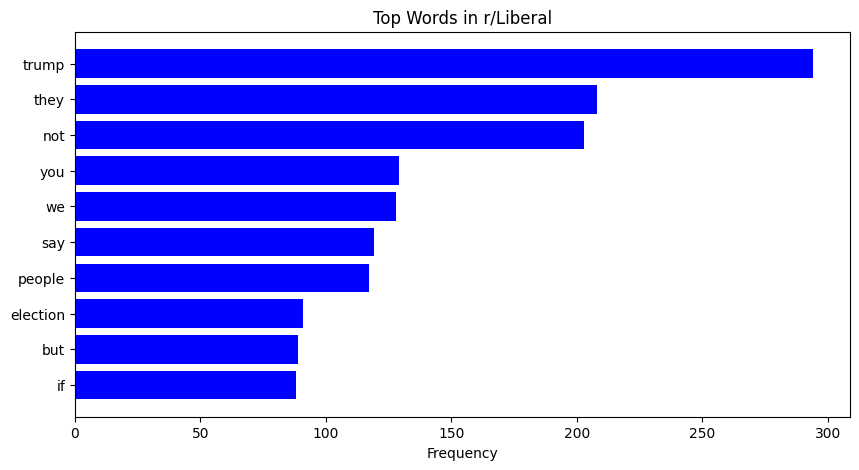

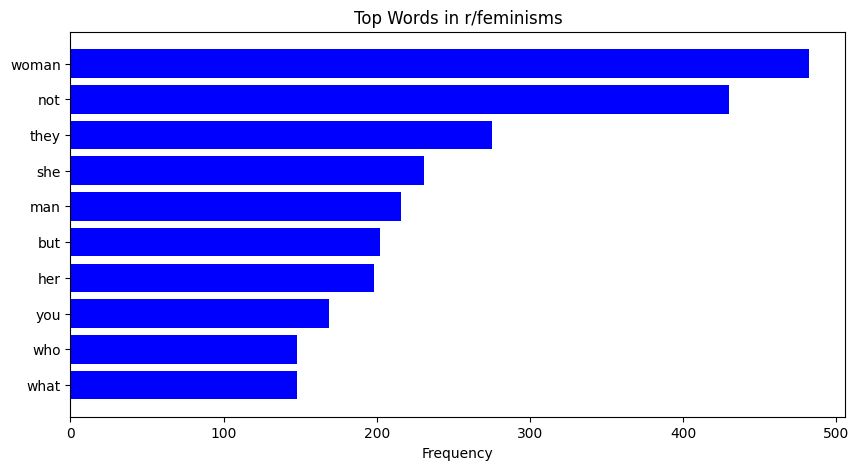

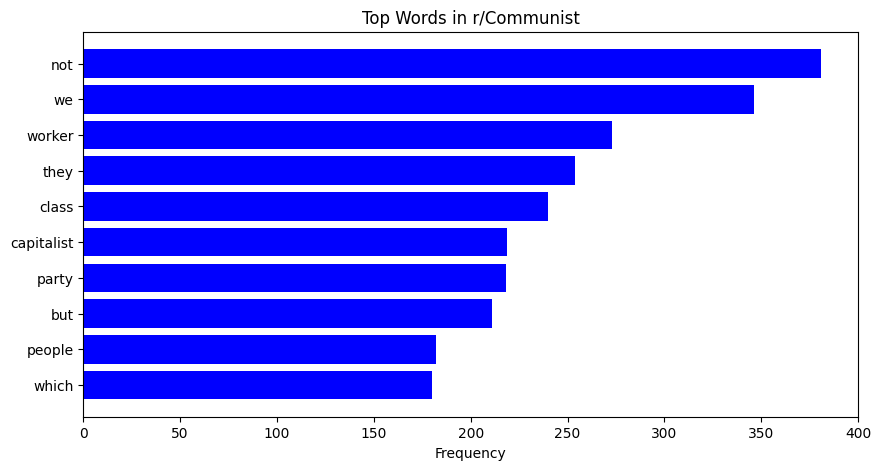

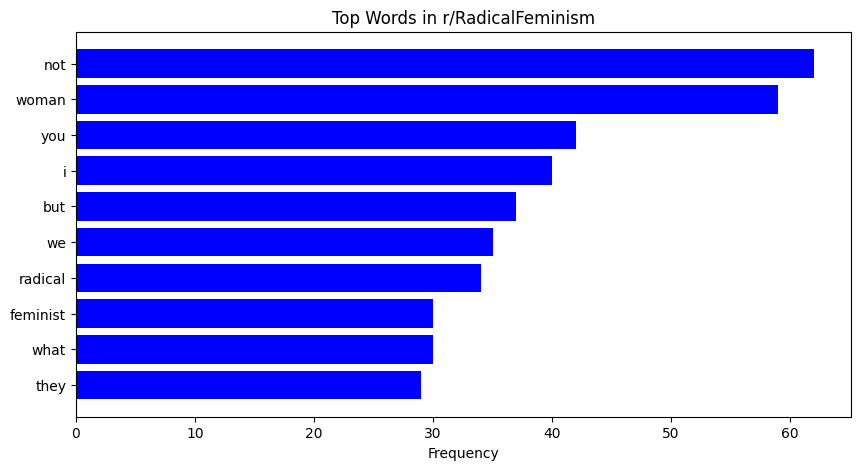

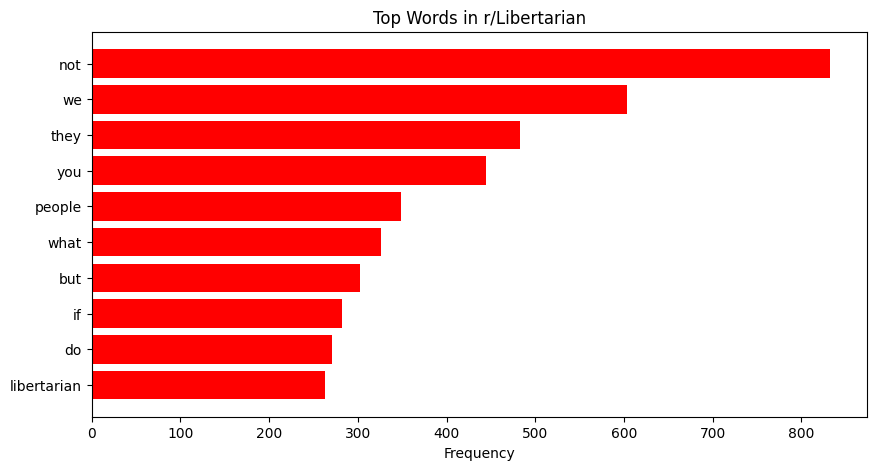

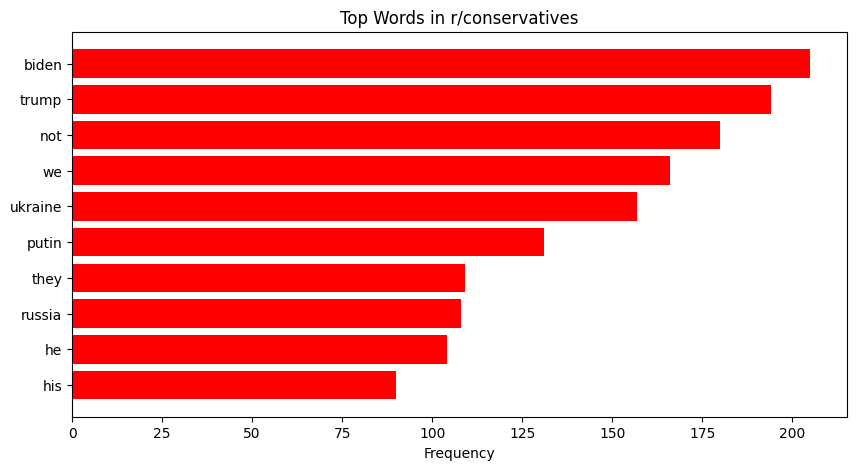

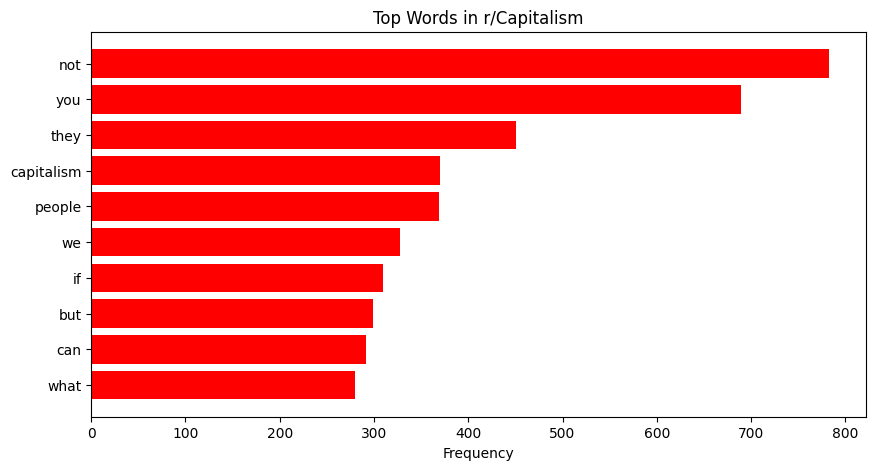

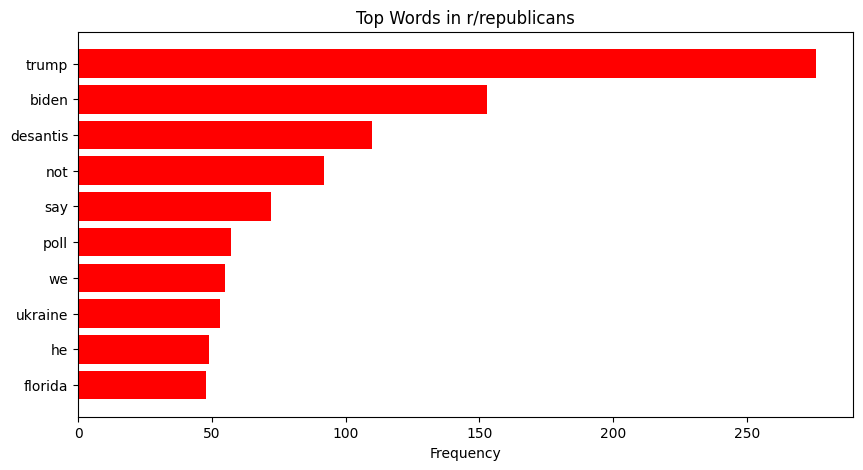

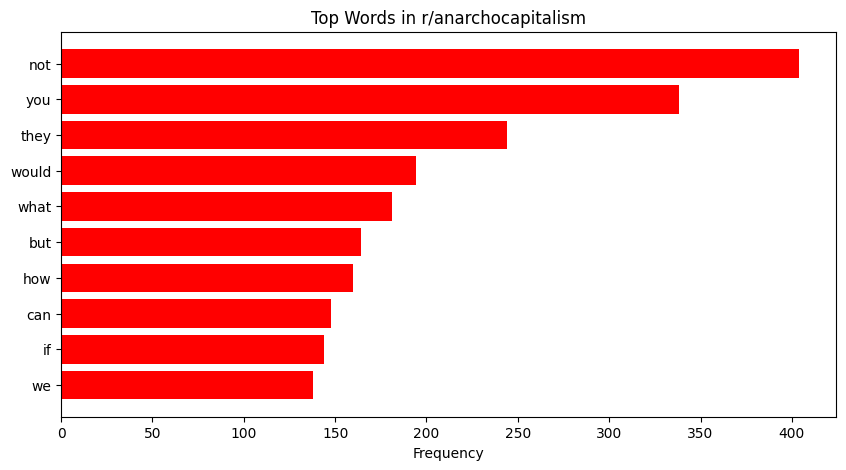

In [43]:
import string
# Helper function to clean and tokenize
def get_word_freq(text_series):
    words = []
    for post in text_series.dropna():
        tokens = post.lower().translate(str.maketrans('', '', string.punctuation)).split()
        words.extend(tokens)
    return Counter(words).most_common(10)

# Reuse your plot function
def plot_top_words(word_freq, title, color):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], counts[::-1], color=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

# Loop through subreddits and plot
subreddits = data['Subreddit'].unique()

for sub in subreddits:
    sub_df = data[data['Subreddit'] == sub]
    word_freq = get_word_freq(sub_df['clean_text'])

    # Set color based on political lean
    lean = sub_df['Political Lean'].mode()[0]
    color = 'red' if lean == 'Conservative' else 'blue'

    plot_top_words(word_freq, f"Top Words in r/{sub}", color)

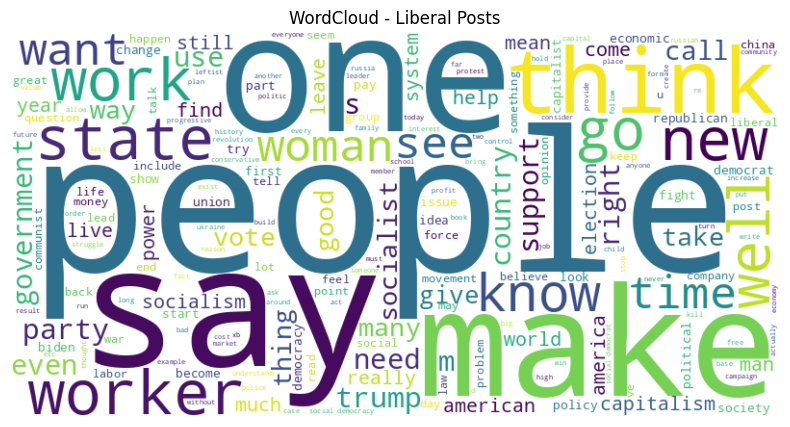

In [44]:
from wordcloud import WordCloud
liberal_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(liberal_posts))
conservative_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(conservative_posts))

# Liberal
plt.figure(figsize=(10, 5))
plt.imshow(liberal_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Liberal Posts")
plt.show()


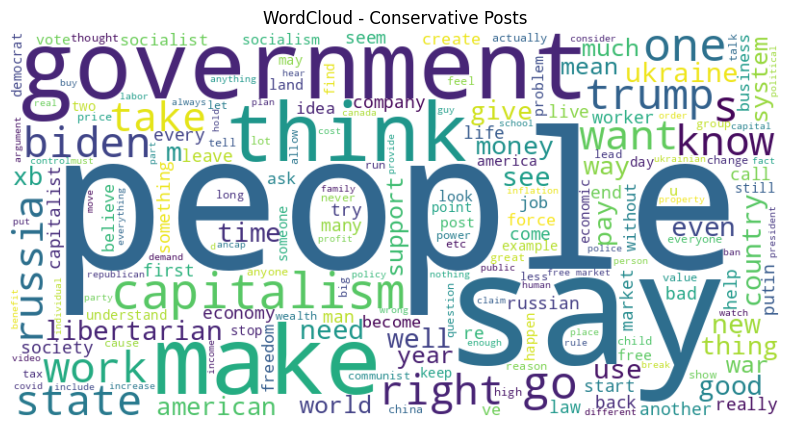

In [45]:
# Conservative
plt.figure(figsize=(10, 5))
plt.imshow(conservative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Conservative Posts")
plt.show()

In [87]:
X=data['clean_text']
Y=data['Political Lean']

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [88]:
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(X)

In [50]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
y_train

,Political Lean
12442,Conservative
2861,Liberal
2231,Liberal
12118,Conservative
3351,Liberal
...,...
11964,Conservative
5191,Liberal
5390,Liberal
860,Liberal


In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7623492804356281
              precision    recall  f1-score   support

Conservative       0.71      0.57      0.63       913
     Liberal       0.79      0.87      0.83      1658

    accuracy                           0.76      2571
   macro avg       0.75      0.72      0.73      2571
weighted avg       0.76      0.76      0.76      2571



In [91]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf_model = RandomForestClassifier(n_estimators=800, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.77009507346586
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2259
           1       0.69      0.63      0.66      1212

    accuracy                           0.77      3471
   macro avg       0.75      0.74      0.74      3471
weighted avg       0.77      0.77      0.77      3471



In [123]:
from xgboost import XGBClassifier
data['label'] = data['Political Lean'].map({'Liberal': 0, 'Conservative': 1})
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.27, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 76.95%


In [136]:
# Manual input
manual_text = ["The Silk Road and AnCap."]

# Vectorize the input (must match shape/features from training)
manual_text_vect = cv.transform(manual_text)

# Predict
manual_pred = rf_model.predict(manual_text_vect)

# Decode the prediction
label_map = {0: 'Liberal', 1: 'Conservative'}
print("Manual Prediction:", label_map[int(manual_pred[0])])


Manual Prediction: Conservative


In [137]:
from sklearn.preprocessing import LabelEncoder

# Encode subreddit labels into numerical values
label_encoder = LabelEncoder()
data['subreddit_label'] = label_encoder.fit_transform(data['Subreddit'])


In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # count-vectorized text
    data['subreddit_label'],
    test_size=0.25,
    random_state=42
)


In [140]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
                      precision    recall  f1-score   support

         Capitalism       0.45      0.45      0.45       223
          Communist       0.49      0.39      0.43       154
DemocraticSocialism       0.31      0.26      0.28       213
            Liberal       0.30      0.30      0.30       209
        Libertarian       0.40      0.40      0.40       274
    RadicalFeminism       0.57      0.35      0.43        23
    SocialDemocracy       0.51      0.44      0.48       244
         alltheleft       0.20      0.40      0.27       252
  anarchocapitalism       0.65      0.38      0.48       156
      conservatives       0.29      0.27      0.28       256
          democrats       0.38      0.35      0.36       248
          feminisms       0.69      0.69      0.69       239
        progressive       0.24      0.24      0.24       247
        republicans       0.34      0.34      0.34       229
          socialism       0.37      0.31      0.34       247

In [146]:
# Manual text input (you can change this to anything you want to test)
sample_text = ["The state should own and control all major industries to avoid exploitation."]

# Step 1: Preprocess (if any preprocessing like lowercasing or removing punctuation was done before)
# If not, just continue with this line

# Step 2: Transform the input using the same vectorizer used for training
sample_vector = cv.transform(sample_text)  # vectorizer must be previously fitted

# Step 3: Predict with the trained XGBoost model
pred_encoded = xgb.predict(sample_vector)

# Step 4: Decode prediction using the label encoder
predicted_subreddit = label_encoder.inverse_transform(pred_encoded)

print("Predicted Subreddit:", predicted_subreddit[0])


Predicted Subreddit: alltheleft
